In [1]:

"""
This section of the code imports necessary libraries and modules for data manipulation, visualization, 
machine learning model building, evaluation, and deep learning.

Libraries and Modules:
- pandas: For data manipulation and analysis.
- numpy: For numerical operations.
- matplotlib.pyplot: For data visualization.
- seaborn: For statistical data visualization.
- sklearn.model_selection: For splitting data into training and testing sets.
- sklearn.metrics: For evaluating machine learning models using various metrics.
- sklearn.ensemble: For ensemble machine learning methods like RandomForest and GradientBoosting.
- sklearn.svm: For Support Vector Machine classifier.
- sklearn.tree: For Decision Tree classifier.
- sklearn.neighbors: For K-Nearest Neighbors classifier.
- tensorflow.keras: For building and training deep learning models using Sequential API.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier


from keras.models import Sequential
from keras.layers import Dense, Dropout

2025-01-16 14:12:37.941800: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Loading the dataset
df = pd.read_csv('./train.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# Data Exploration and Preprocessing

In [3]:
df['CALC'].value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

In [4]:
# Convert 'Always' category in CALC column to 'Frequently'
df['CALC'] = df['CALC'].replace('Always', 'Frequently')


In [5]:
df.drop(columns=['id'], inplace=True)

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
for i in df.columns:
    print(i, df[i].nunique())

Gender 2
Age 1703
Height 1833
Weight 1979
family_history_with_overweight 2
FAVC 2
FCVC 934
NCP 689
CAEC 4
SMOKE 2
CH2O 1506
SCC 2
FAF 1360
TUE 1297
CALC 3
MTRANS 5
NObeyesdad 7


In [10]:
"""
This block of code performs label encoding on specified categorical columns in a DataFrame.

The columns to be encoded are:
- 'Gender'
- 'family_history_with_overweight'
- 'FAVC'
- 'SMOKE'
- 'SCC'

Label encoding is applied to these columns using the LabelEncoder from sklearn, which converts the categorical values into numeric values.
"""

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

le = LabelEncoder()

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])



In [11]:
"""
This code snippet encodes the 'NObeyesdad' column of the DataFrame `df` using `LabelEncoder` from scikit-learn.
It then prints a dictionary that maps each class in the 'NObeyesdad' column to its corresponding encoded number.

Steps:
1. Initialize a `LabelEncoder` instance.
2. Fit and transform the 'NObeyesdad' column of the DataFrame `df` using the `LabelEncoder`.
3. Print a dictionary that shows the mapping of original class labels to their encoded numerical values.

Variables:
- le: An instance of `LabelEncoder`.
- df: A pandas DataFrame containing the 'NObeyesdad' column to be encoded.

Output:
- A dictionary printed to the console that maps each class label in 'NObeyesdad' to its corresponding encoded number.
"""

le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

# Print the mapping of original class labels to their encoded numerical values
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


In [12]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,6
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,no,Automobile,1
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,no,Public_Transportation,0
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,4
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,6


<Axes: >

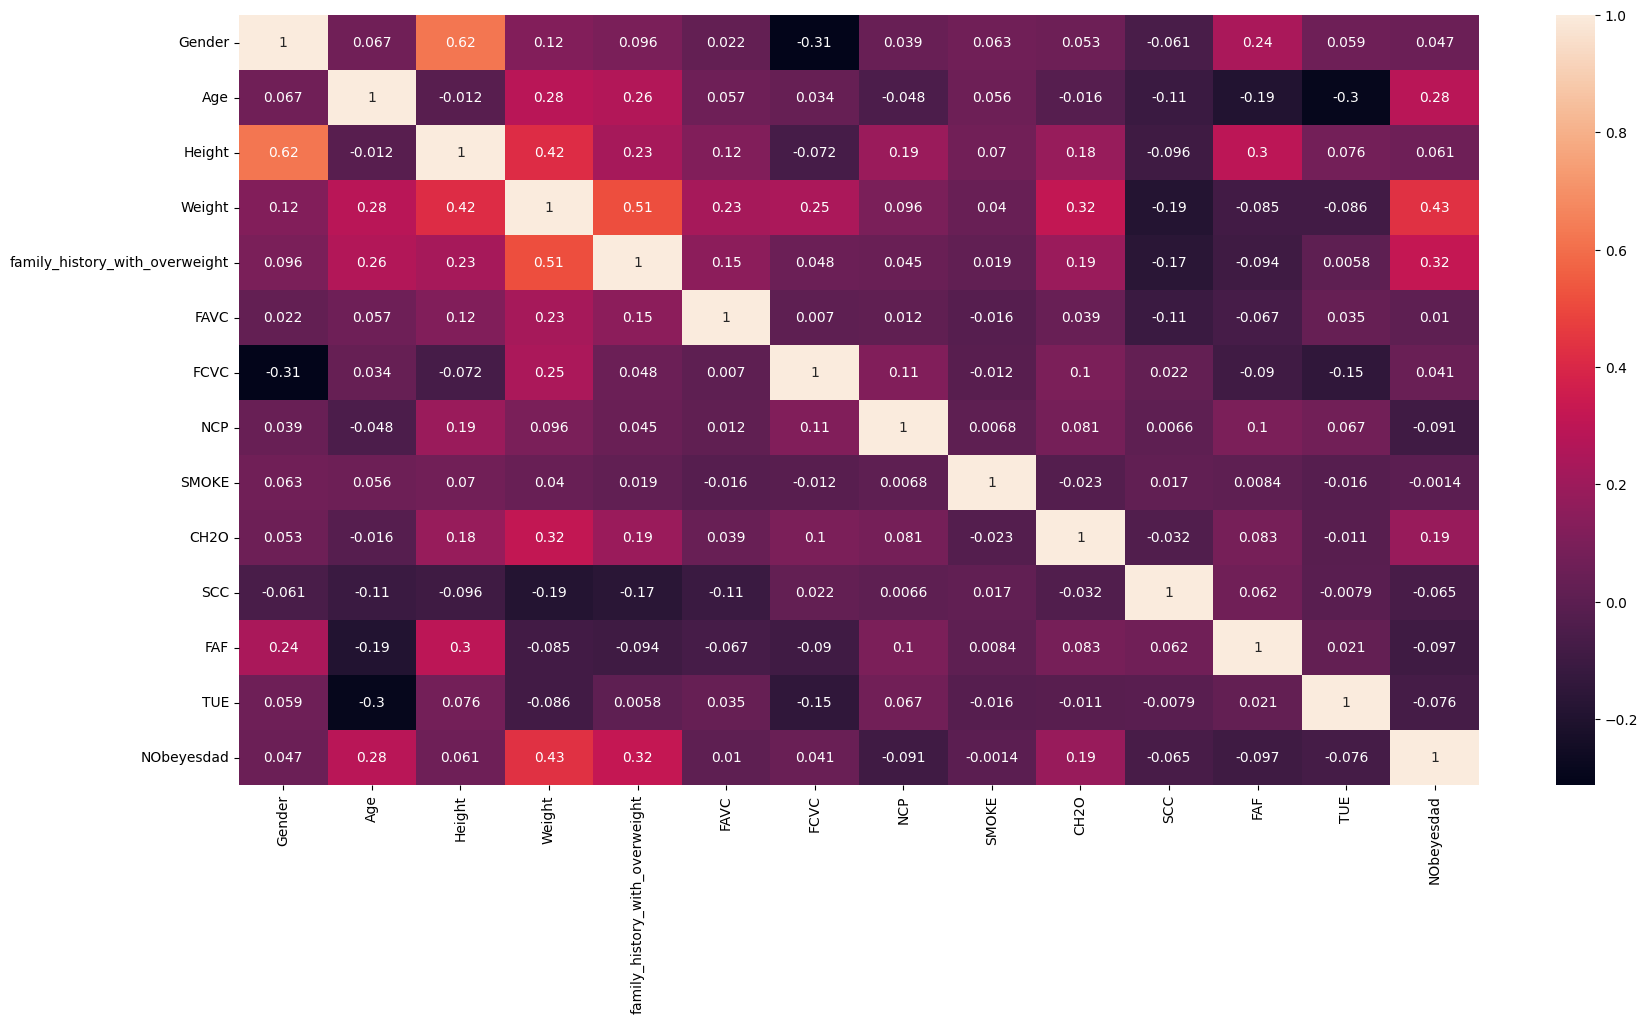

In [13]:
"""
This code snippet selects numerical columns from a DataFrame and generates a heatmap 
to visualize the correlation between these numerical features.
"""

numerical = df.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 10))

# Generate heatmap for correlation matrix
sns.heatmap(numerical.corr(), annot=True)

In [14]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [15]:
# Perform one hot encoding for the categorical columns

df = pd.get_dummies(df, columns=['MTRANS', 'CAEC', 'CALC'])

# Data Splitting

In [16]:
# Split the data into training and testing sets

X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
df['NObeyesdad'].value_counts()

NObeyesdad
4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: count, dtype: int64

# Model Training

In [18]:
"""
Trains a multi-class Random Forest classifier with cross-validation and evaluates its performance.

Steps:
1. Initializes a Random Forest classifier with 100 estimators and a fixed random state for reproducibility.
2. Performs 5-fold cross-validation on the training data and prints the accuracy scores for each fold.
3. Fits the Random Forest model on the entire training dataset.
4. Predicts the labels for the test dataset.
5. Prints the accuracy and weighted F1 score of the model on the test dataset.

Variables:
- rf: RandomForestClassifier object
- scores: List of accuracy scores from cross-validation
- y_pred: Predicted labels for the test dataset

Functions:
- cross_val_score: Evaluates a score by cross-validation
- accuracy_score: Computes the accuracy of the model
- f1_score: Computes the F1 score of the model
"""

rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", scores)

# Test the model, print accuracy and F1 Score

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))


Cross-validation accuracy scores: [0.88832029 0.89581451 0.88979223 0.89400783 0.90635351]
Accuracy: 0.8952312138728323
F1 Score: 0.895202172054519


In [19]:
"""
This script defines and compiles a neural network model using Keras Sequential API.
The model architecture includes:
- An input layer with 128 neurons and ReLU activation function.
- A dropout layer with a dropout rate of 0.5 to prevent overfitting.
- A hidden layer with 64 neurons and ReLU activation function.
- A hidden layer with 32 neurons and ReLU activation function.
- A hidden layer with 16 neurons and sigmoid activation function.
- An output layer with 7 neurons and softmax activation function for multi-class classification.

The model is compiled with:
- Loss function: sparse_categorical_crossentropy
- Optimizer: Adam
- Metrics: accuracy and f1_score
"""

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'f1_score'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Train the model with 100 epochs
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2402 - f1_score: 0.2555 - loss: 1.8905 - val_accuracy: 0.4371 - val_f1_score: 0.2586 - val_loss: 1.3843
Epoch 2/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4495 - f1_score: 0.2647 - loss: 1.3414 - val_accuracy: 0.5655 - val_f1_score: 0.2666 - val_loss: 1.0501
Epoch 3/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5904 - f1_score: 0.2701 - loss: 1.0430 - val_accuracy: 0.7406 - val_f1_score: 0.2723 - val_loss: 0.8191
Epoch 4/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6819 - f1_score: 0.2719 - loss: 0.8563 - val_accuracy: 0.7690 - val_f1_score: 0.2721 - val_loss: 0.6974
Epoch 5/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7047 - f1_score: 0.2722 - loss: 0.7712 - val_accuracy: 0.7746 - val_f1_score: 0.2724 - val_loss: 0.6318
Epoch 6/100
519/519 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7264 - f1_score: 0.2722 - loss: 0.6996 - val_accuracy: 0.7712 - val_f1_score: 

In [21]:
"""
This script trains a K-Nearest Neighbors (KNN) algorithm with cross-validation and evaluates its performance.

Steps:
1. Import the necessary libraries.
2. Initialize the KNN classifier with 5 neighbors.
3. Perform cross-validation on the training data and print the accuracy scores.
4. Train the KNN model on the entire training dataset.
5. Predict the labels for the test dataset.
6. Print the accuracy and F1 score of the model on the test dataset.

Variables:
- knn: KNeighborsClassifier object initialized with 5 neighbors.
- scores: Cross-validation accuracy scores.
- y_pred: Predicted labels for the test dataset.

Functions:
- cross_val_score: Performs cross-validation and returns accuracy scores.
- fit: Trains the KNN model on the training dataset.
- predict: Predicts the labels for the test dataset.
- accuracy_score: Computes the accuracy of the model.
- f1_score: Computes the F1 score of the model.
"""

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", scores)

# Test the model, print accuracy and F1 Score

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

Cross-validation accuracy scores: [0.83804937 0.84763625 0.83709726 0.84522734 0.85305631]
Accuracy: 0.8415221579961464
F1 Score: 0.8404729500844377


In [22]:
"""
This script trains a Support Vector Machine (SVM) model using a polynomial kernel to predict obesity risk.
It performs the following steps:
1. Imports the necessary libraries and modules.
2. Initializes the SVM model with a polynomial kernel.
3. Performs cross-validation on the training data and prints the accuracy scores.
4. Fits the SVM model to the training data.
5. Predicts the labels for the test data.
6. Prints the accuracy and F1 score of the model on the test data.

Variables:
- svc: The Support Vector Classifier (SVC) model with a polynomial kernel.
- scores: The cross-validation accuracy scores.
- y_pred: The predicted labels for the test data.

Functions:
- cross_val_score: Performs cross-validation and returns the accuracy scores.
- fit: Fits the SVM model to the training data.
- predict: Predicts the labels for the test data.
- accuracy_score: Computes the accuracy of the model.
- f1_score: Computes the F1 score of the model.
"""

svc = SVC(kernel='poly')
scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", scores)

# Test the model, print accuracy and F1 Score

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

Cross-validation accuracy scores: [0.73419627 0.72628726 0.72568503 0.72749172 0.74314965]
Accuracy: 0.7418111753371869
F1 Score: 0.7388764612163182


In [23]:
# Train XGBoost Model
from xgboost import XGBClassifier

xgb = XGBClassifier()
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')

print(scores)

[0.89554485 0.90936465 0.8976212  0.90274014 0.9168925 ]


In [24]:
# Test the model and print accuracy and F1 Score, also print ROC AUC score
from sklearn.metrics import roc_auc_score
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9019749518304432
F1 Score: 0.9021547563450466


In [25]:
# Do a Grid Search for XGBoost Classifier
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': [0.01, 0.1, 0.2, 0.3], 'lambda': [0.1, 0.5, 1, 2], 'alpha': [0.1, 0.5, 1, 2]}
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("The best XGBoost model is the one with the following hyperparameters:")
print(grid_search.best_params_)

The best XGBoost model is the one with the following hyperparameters:
{'alpha': 0.1, 'lambda': 2, 'learning_rate': 0.2}


In [26]:
"""
This script trains an XGBoost classifier on the provided training data and evaluates its performance on the test data.

Steps:
1. Initializes an XGBoost classifier with specified hyperparameters.
2. Fits the classifier to the training data.
3. Predicts the labels for the test data.
4. Prints the accuracy and weighted F1 score of the predictions.

Parameters:
- X_train: Training feature set.
- y_train: Training labels.
- X_test: Test feature set.
- y_test: Test labels.

Hyperparameters:
- learning_rate: Step size shrinkage used to prevent overfitting.
- reg_lambda: L2 regularization term on weights.
- reg_alpha: L1 regularization term on weights.

Outputs:
- Accuracy: The proportion of correctly classified instances in the test set.
- F1 Score: The weighted average of precision and recall, considering the class imbalance.
"""

xgb = XGBClassifier(learning_rate=0.3, reg_lambda=0.1, reg_alpha=0.1) # type: ignore

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.903179190751445
F1 Score: 0.9033759644472283


In [27]:
# Print a table with each model and its accuracy and F1 Score
models = ['Random Forest', 'K-Nearest Neighbors', 'SVM', 'XGBoost']
accuracies = [accuracy_score(y_test, rf.predict(X_test)), accuracy_score(y_test, knn.predict(X_test)), accuracy_score(y_test, svc.predict(X_test)), accuracy_score(y_test, xgb.predict(X_test))]
f1_scores = [f1_score(y_test, rf.predict(X_test), average='weighted'), f1_score(y_test, knn.predict(X_test), average='weighted'), f1_score(y_test, svc.predict(X_test), average='weighted'), f1_score(y_test, xgb.predict(X_test), average='weighted')]
results = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'F1 Score': f1_scores})

print(
    "Comparison of Machine Learning Models:\n",
    results
)

Comparison of Machine Learning Models:
                  Model  Accuracy  F1 Score
0        Random Forest  0.895231  0.895202
1  K-Nearest Neighbors  0.841522  0.840473
2                  SVM  0.741811  0.738876
3              XGBoost  0.903179  0.903376


# Testing test.csv with the best model

In [28]:
test = pd.read_csv('./test.csv')

# Do all the preprocessing that was done for the training set

test['CALC'] = test['CALC'].replace('Always', 'Frequently')
id = test['id']
test.drop(columns=['id'], inplace=True)



In [29]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
lE = LabelEncoder()

for col in columns_to_encode:
    test[col] = lE.fit_transform(test[col])

In [30]:
test = pd.get_dummies(test, columns=['MTRANS', 'CAEC', 'CALC'])


In [31]:
y_pred = xgb.predict(test)

In [32]:
sample_file = pd.read_csv('./sample_submission.csv')
sample_file.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [33]:
# Map y_pred values according to this {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}

y_pred = pd.Series(y_pred).map({0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'})

In [34]:
submission = pd.concat([id, y_pred], axis=1)
submission.columns = ['id', 'NObeyesdad']
submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [35]:
submission.to_csv('./submission.csv', index=False)